In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Users - Data Quality Issues

## Completeness
 Are there any NULL values for any rows for any fields?

In [2]:
# Create pandas dataframe from csv and get summary of columns and null counts to check for data completeness
users = pd.read_csv('USER_TAKEHOME.csv')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


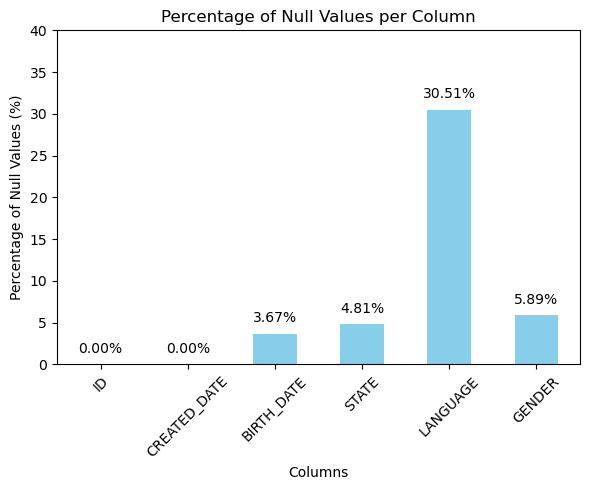

In [7]:
# Create bar graph that shows percentage of null values per column
null_percentage = users.isnull().mean() * 100
plt.figure(figsize=(6, 5))
ax = null_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Null Values per Column')
plt.xlabel('Columns')
plt.ylim(0,40)
plt.ylabel('Percentage of Null Values (%)')
plt.xticks(rotation=45)

for i, v in enumerate(null_percentage):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

## Validity
 For non-null values, do they make sense for their respective columns?

In [18]:
# Find unique values and counts for the ID column which acts like the ID column for this dataset
# Filter this to find instances of duplicate values
id_value_counts = users['ID'].value_counts()
filtered_id_value_counts = id_value_counts[id_value_counts > 1]

print(filtered_id_value_counts)

Series([], Name: ID, dtype: int64)


In [19]:
# Find unique values and counts for the CREATED_DATE column, looking for invalid values
created_date_value_counts = users['CREATED_DATE'].value_counts().sort_values(ascending=False)

print(created_date_value_counts)

2023-01-12 18:30:15.000 Z    2
2023-01-30 18:20:35.000 Z    2
2020-10-25 20:14:04.000 Z    2
2022-07-28 18:04:17.000 Z    2
2022-09-18 20:05:19.000 Z    2
                            ..
2022-04-17 18:33:03.000 Z    1
2022-08-20 18:09:05.000 Z    1
2021-06-13 21:58:25.000 Z    1
2020-04-01 22:55:46.000 Z    1
2020-03-25 01:30:30.000 Z    1
Name: CREATED_DATE, Length: 99942, dtype: int64


In [14]:
# Find unique values and counts for the CREATED_DATE column, looking for invalid values
birth_date_value_counts = users['BIRTH_DATE'].value_counts().sort_values(ascending=False)

print(birth_date_value_counts)

1970-01-01 00:00:00.000 Z    1272
1979-12-11 08:00:00.000 Z      63
2000-12-12 00:00:00.000 Z      28
2000-12-31 00:00:00.000 Z      23
2001-01-01 00:00:00.000 Z      16
                             ... 
1962-12-11 19:52:49.000 Z       1
1998-04-03 06:00:00.000 Z       1
1997-08-16 16:50:25.000 Z       1
2002-09-14 04:00:00.000 Z       1
1995-06-09 04:00:00.000 Z       1
Name: BIRTH_DATE, Length: 54721, dtype: int64


In [16]:
# Find unique values and counts for the STATE column, looking for invalid values
state_value_counts = users['STATE'].value_counts().sort_values(ascending=False)

print(state_value_counts)

TX    9028
FL    8921
CA    8589
NY    5703
IL    3794
GA    3718
PA    3644
OH    3519
NC    3399
NJ    2899
MI    2582
VA    2400
IN    2213
TN    2165
AL    1792
SC    1773
KY    1731
AZ    1728
MO    1652
MD    1636
MA    1523
WI    1389
PR    1361
LA    1290
WA    1234
CO    1139
MN    1125
CT    1110
OK    1100
AR    1011
MS     960
IA     933
NV     837
KS     835
OR     700
WV     674
UT     593
DE     492
NE     487
NM     452
ME     368
NH     359
HI     350
ID     350
AK     297
RI     284
DC     241
SD     205
ND     185
MT     169
WY     138
VT     111
Name: STATE, dtype: int64


In [17]:
# Find unique values and counts for the LANGUAGE column, looking for invalid values
language_value_counts = users['LANGUAGE'].value_counts().sort_values(ascending=False)

print(language_value_counts)

en        63403
es-419     6089
Name: LANGUAGE, dtype: int64


In [20]:
# Find unique values and counts for the LANGUAGE column, looking for invalid values
gender_value_counts = users['GENDER'].value_counts().sort_values(ascending=False)

print(gender_value_counts)

female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: GENDER, dtype: int64


## Users - Summary
### Completeness
- All columns in the USERS dataset besides the ID and CREATED_DATE columns have NULL values which is not good in terms of data completeness.

### Validity
- The BIRTH_DATE column has an abnormally high count of 1970-01-01 values. This is most likely a default value and not an accurate value for all these users. For this column, there should not be a set date that is the default value because it's not obvious that this is a default value.

- The LANGUAGE column has a unique value of es-419. I assume this is Espanol but no idea what the 419 indicates. The other unique value is en (I assume this is English). For LANGUAGE, values would be more clear as the full name of the language and not an abbreviation.

- The GENDER column has unique values that are basically duplicates of each other. For example, prefer_not_to_say and Prefer not to say, not_listed and My gender isn’t listed. These are different versions of the same value and there should only be one unique value for these options.